In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [18]:
#load dataset
df=pd.read_csv('/content/Brain_Tumor_Prediction_Dataset.csv')

In [19]:
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No


In [20]:
#shape of dataset
df.shape

(250000, 21)

#***EDA(Explotary Data Analysis):-***

In [21]:
#dataset of information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Blood_Pressure       250000 non-null  object 
 13  Diabetes             250000 non-null  object 
 14  Tumor_Type           250000 non-null  object 
 15  Treatment_Receive

In [22]:
#dataset describe
df.describe()

,Age,Tumor_Size,Genetic_Risk,Survival_Rate(%)
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,46.962424,5.251768,49.998916,54.481532
std,24.517143,2.742576,29.178031,25.999932
min,5.000000,0.500000,0.000000,10.000000
25%,26.000000,2.870000,25.000000,32.000000
50%,47.000000,5.260000,50.000000,55.000000
75%,68.000000,7.630000,75.000000,77.000000
max,89.000000,10.000000,100.000000,99.000000


In [23]:
#Check the missing values
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Tumor_Size,0
Tumor_Location,0
MRI_Findings,0
Genetic_Risk,0
Smoking_History,0
Alcohol_Consumption,0
Radiation_Exposure,0


In [24]:
#Treatment_Received fillna  null values none
df['Treatment_Received'].fillna('None',inplace=True)

In [25]:
#Treatment_Received
df['Treatment_Received'].value_counts()

,count
Treatment_Received,
None,62748
Chemotherapy,62719
Radiation,62383
Surgery,62150


In [26]:
#check the null values
df.isnull().sum().any()

False

In [27]:
#check the duplicated
df.duplicated().sum()

0

In [28]:
#check the categorical column list
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'Country', 'Tumor_Location', 'MRI_Findings',
       'Smoking_History', 'Alcohol_Consumption', 'Radiation_Exposure',
       'Head_Injury_History', 'Chronic_Illness', 'Blood_Pressure', 'Diabetes',
       'Tumor_Type', 'Treatment_Received', 'Tumor_Growth_Rate',
       'Family_History', 'Symptom_Severity', 'Brain_Tumor_Present'],
      dtype='object')

In [29]:
#num_col column list
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'Tumor_Size', 'Genetic_Risk', 'Survival_Rate(%)'], dtype='object')

#***Data Visualization:-***

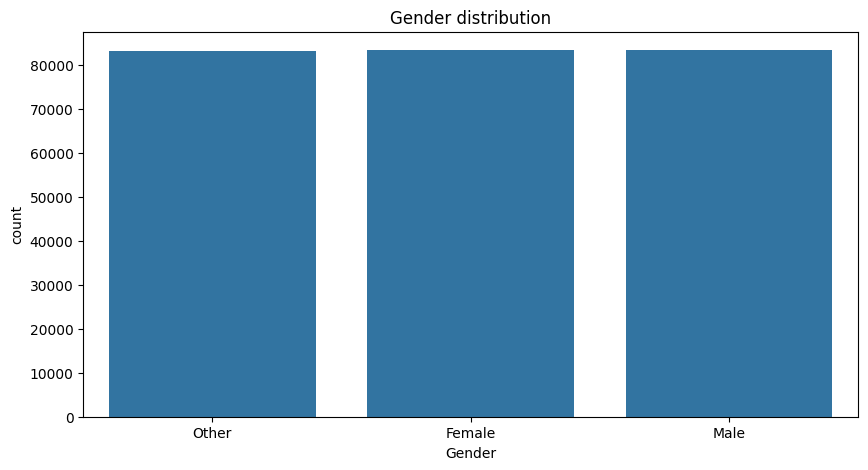

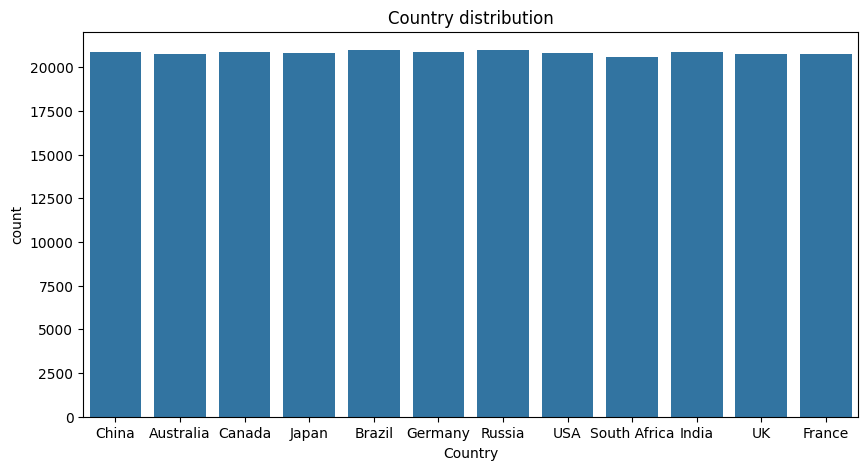

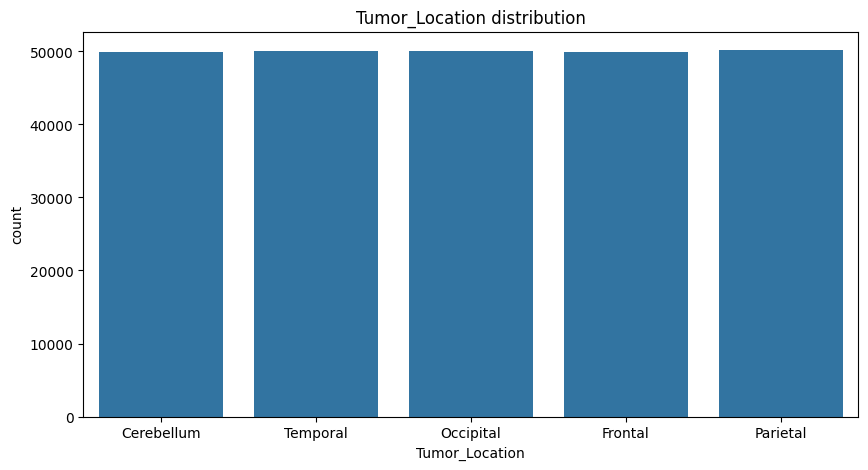

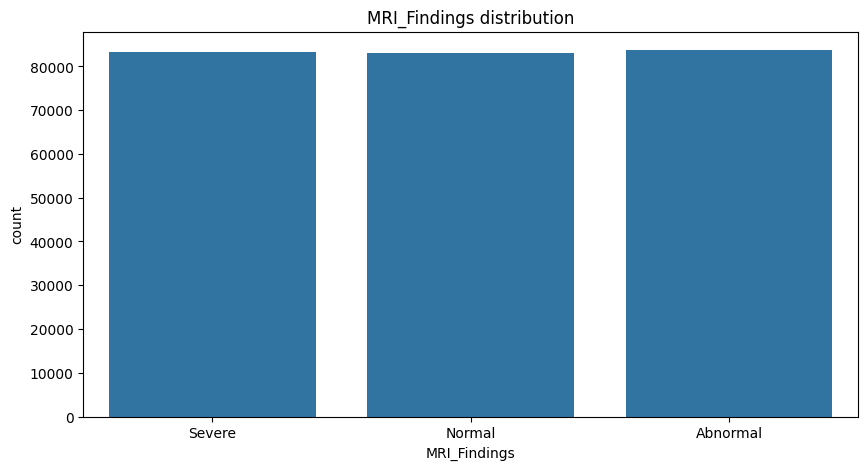

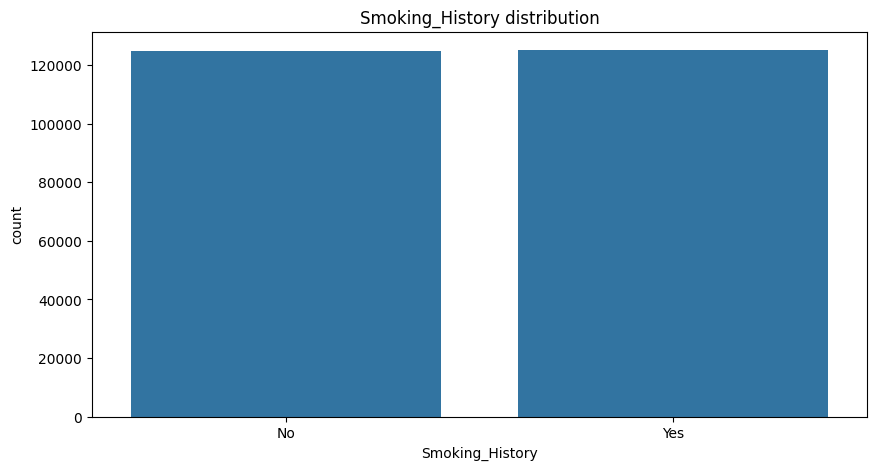

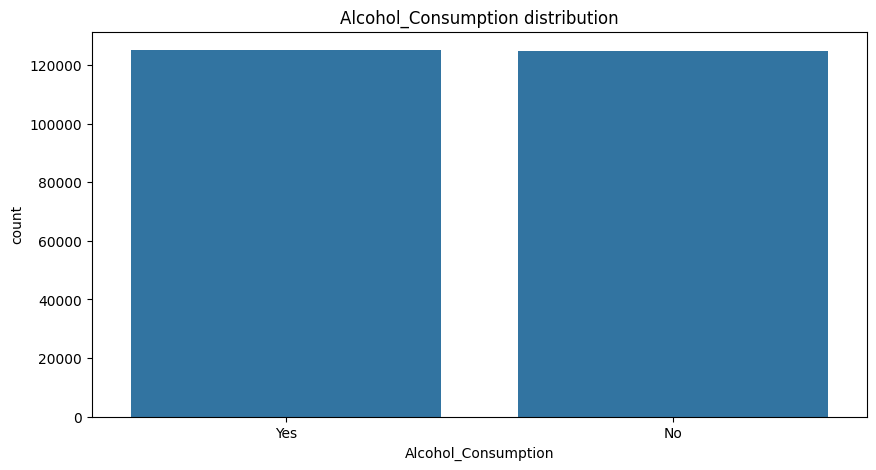

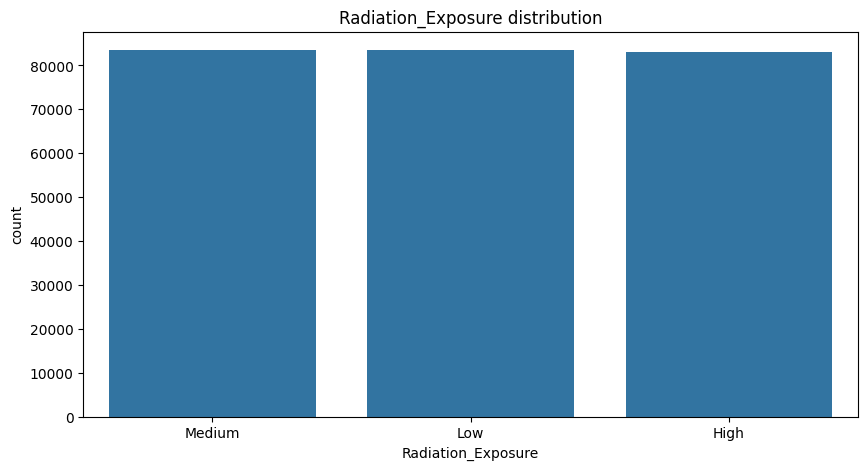

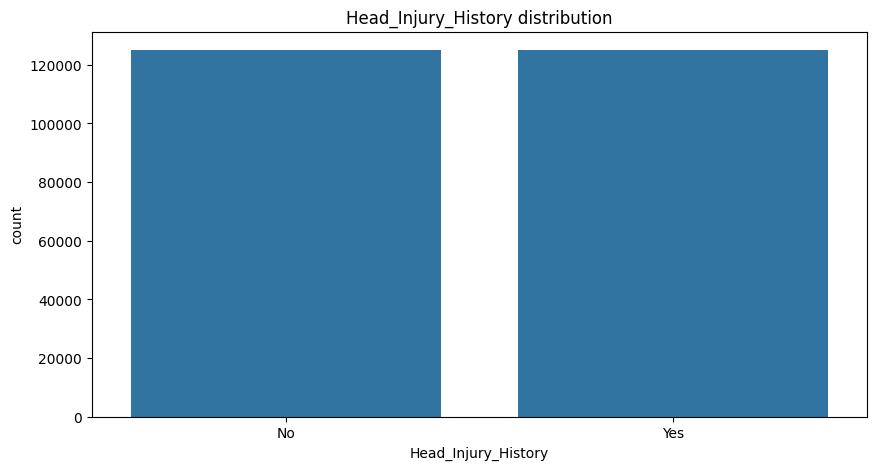

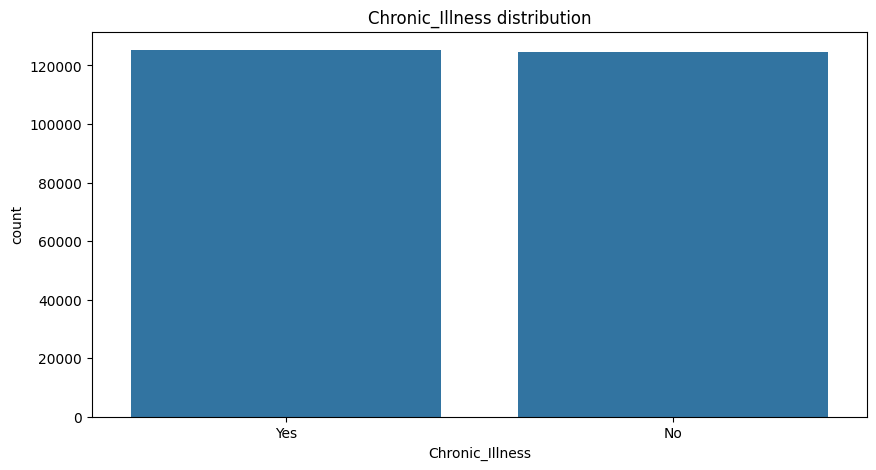

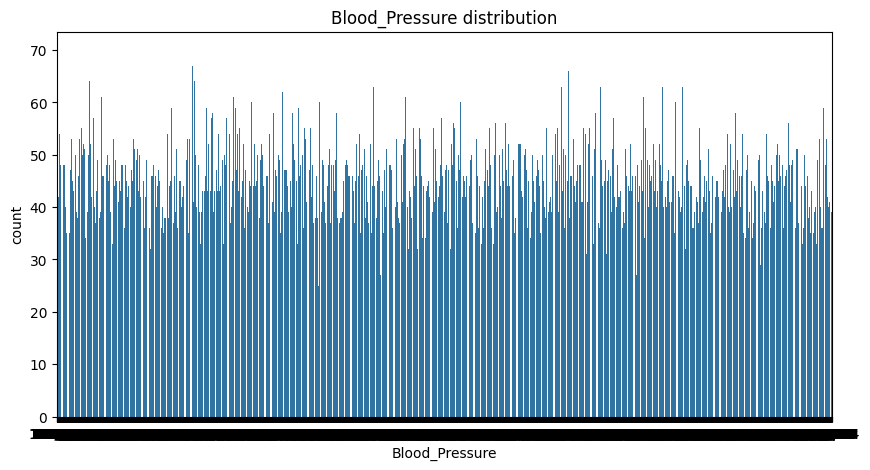

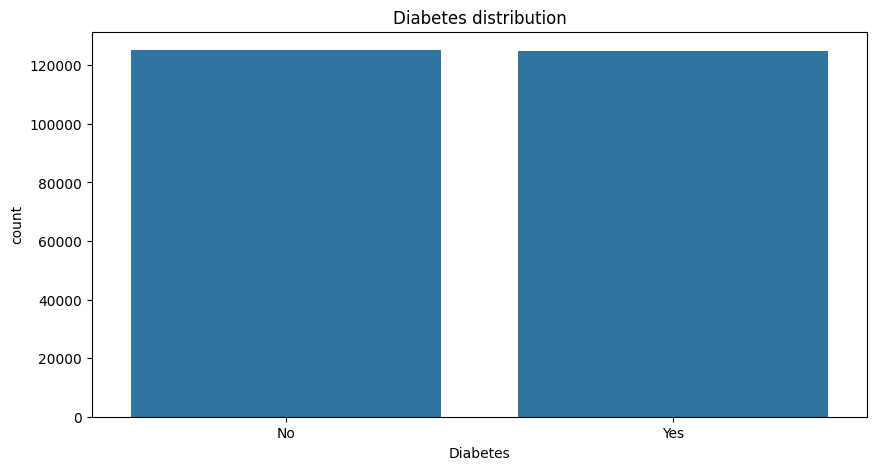

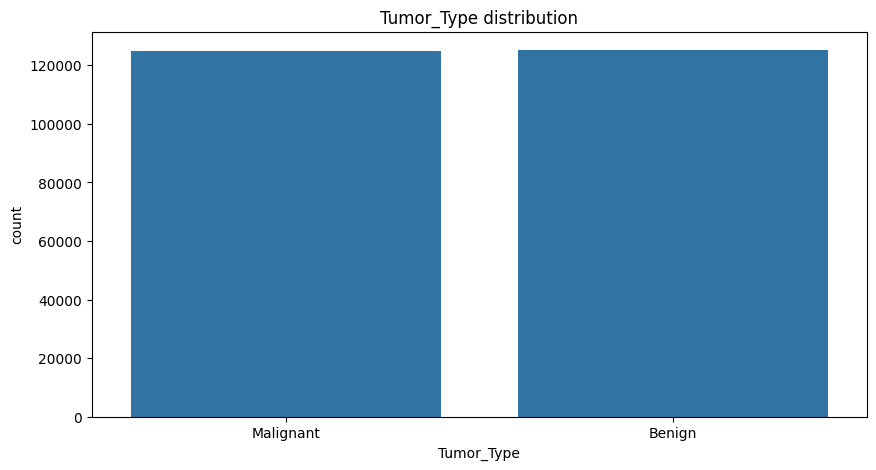

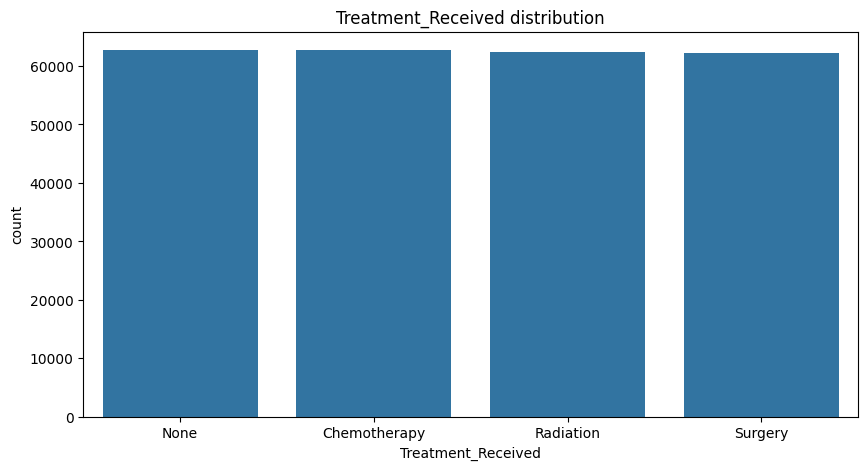

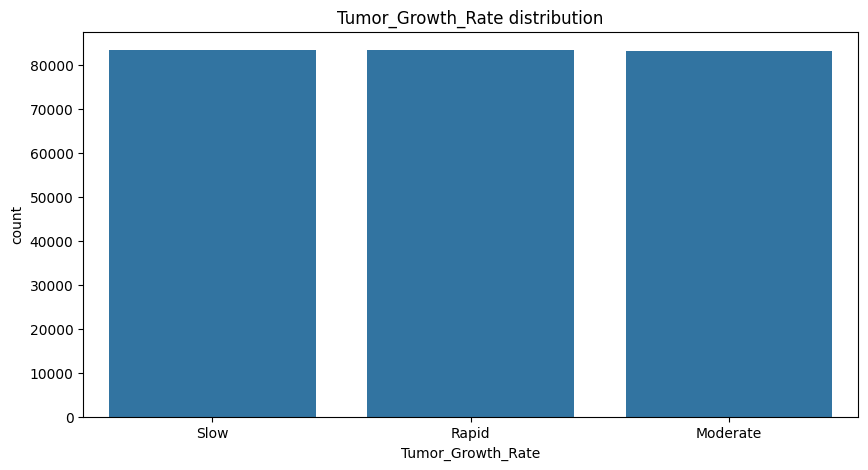

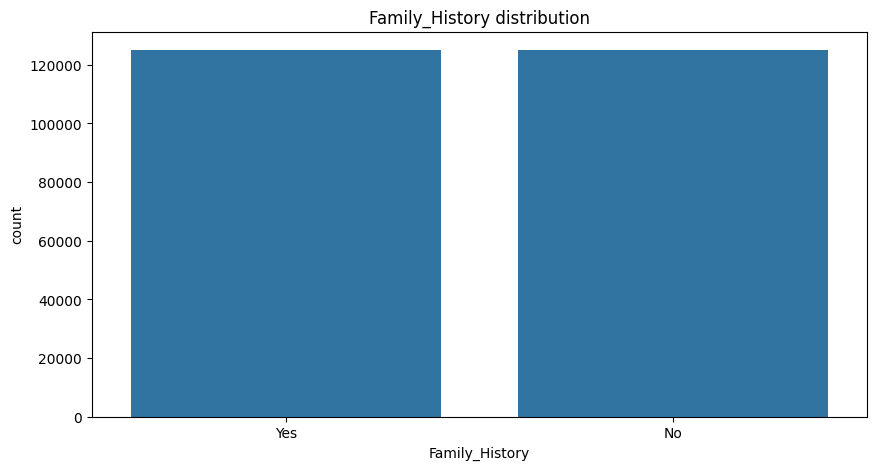

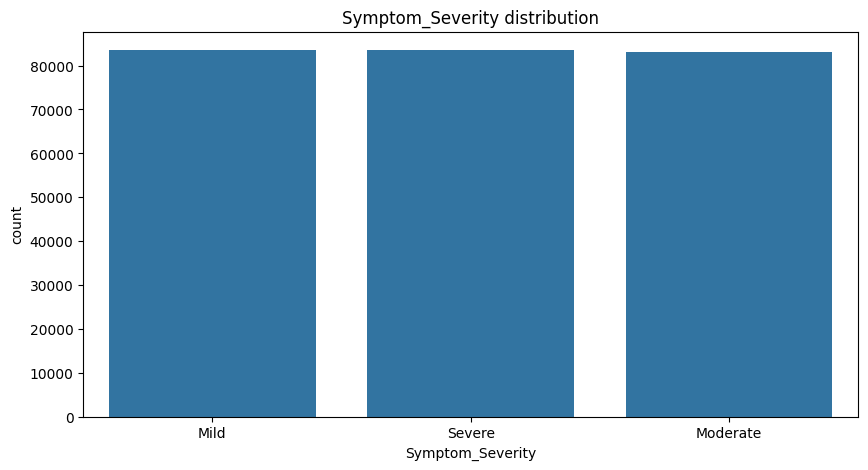

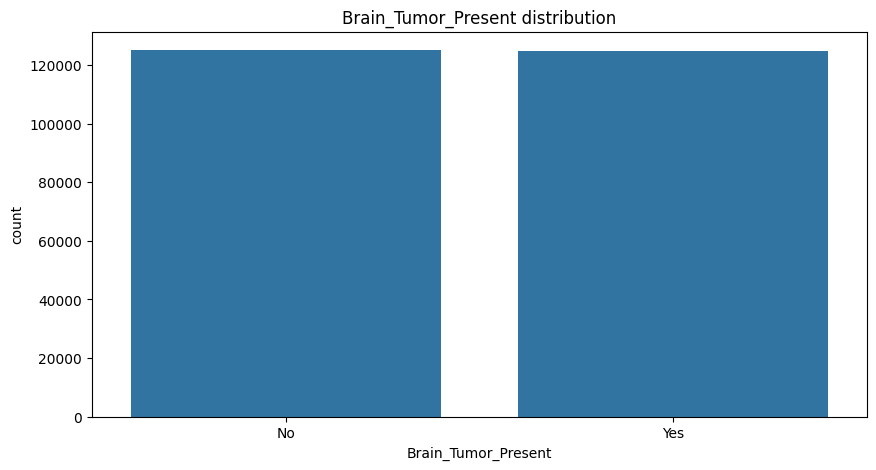

In [30]:
#data visualization of categorical column
for col in cate_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df)
  plt.title(f"{col} distribution")
  plt.show()

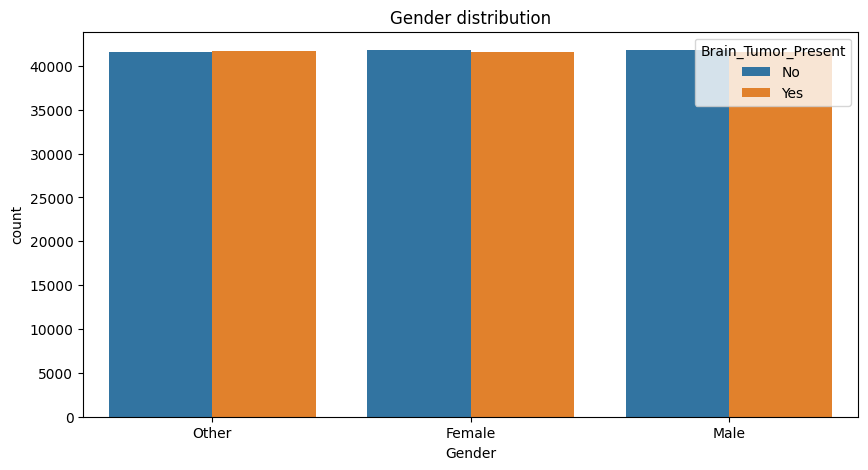

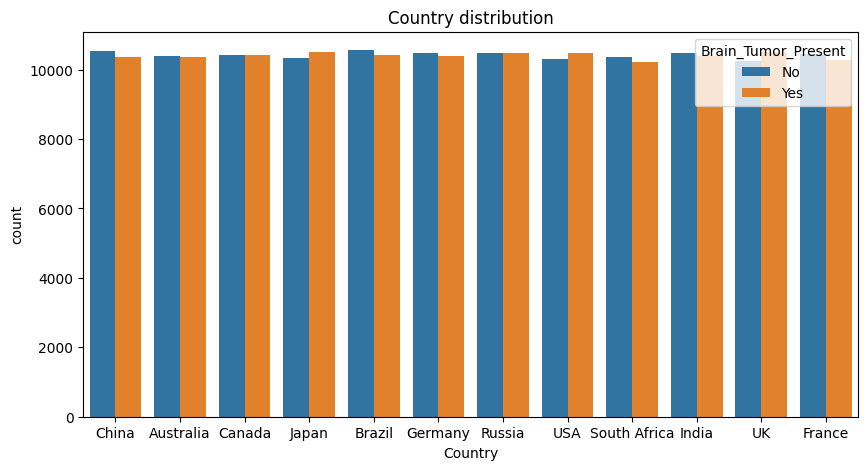

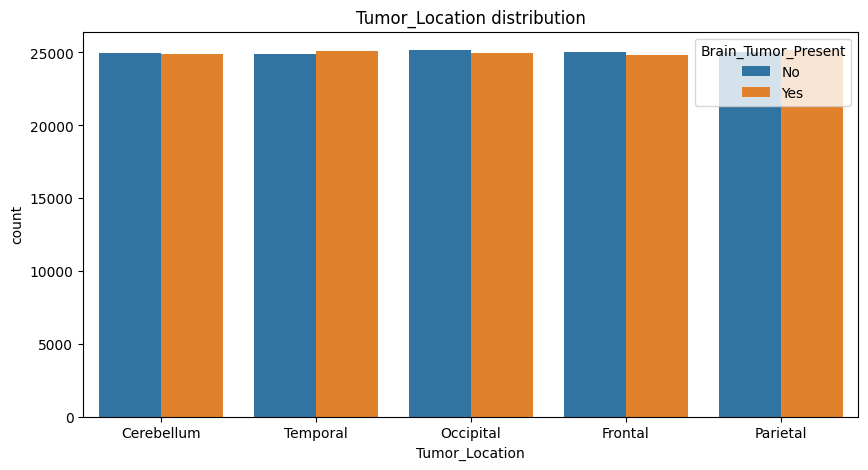

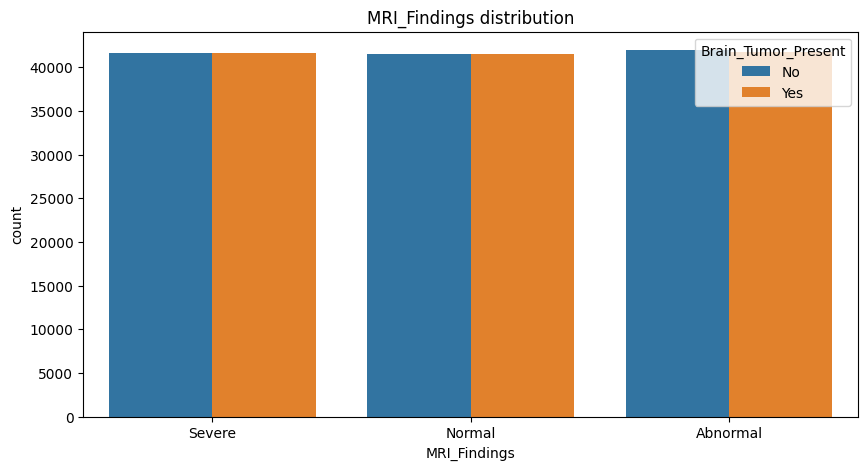

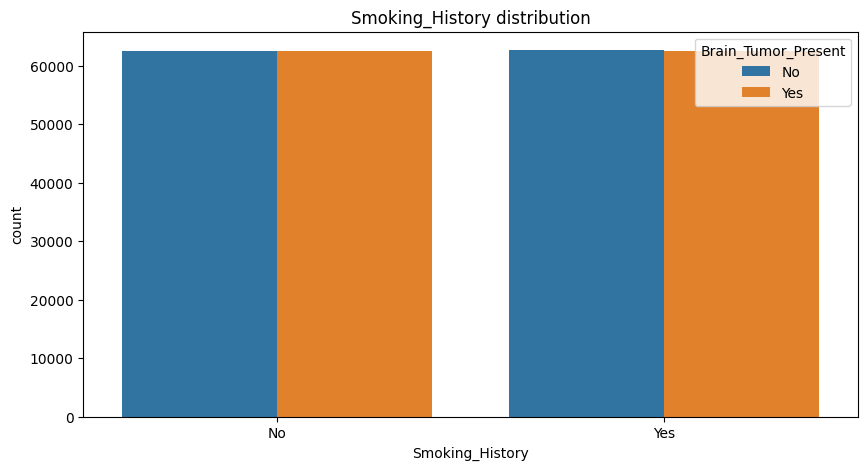

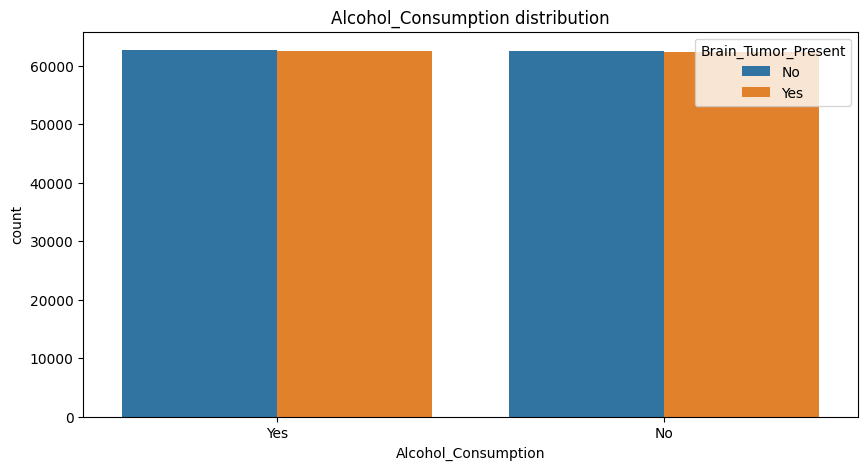

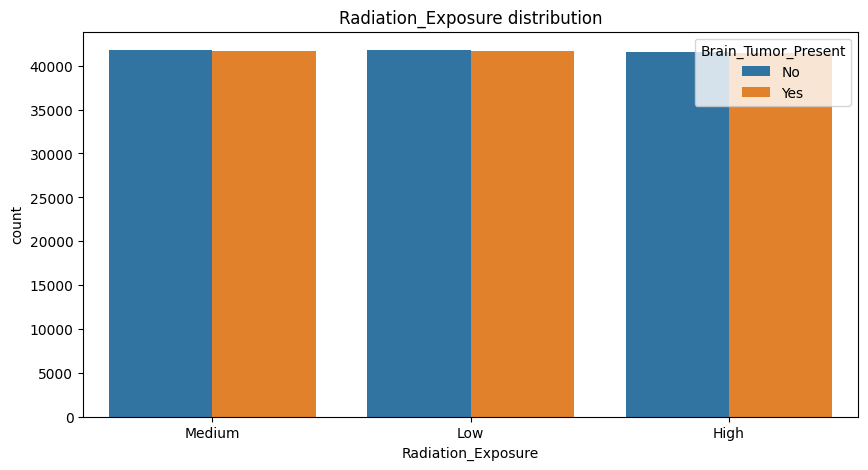

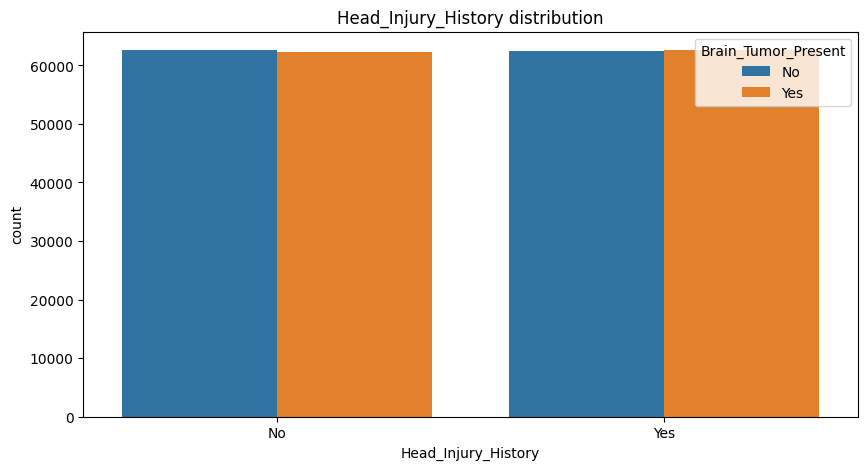

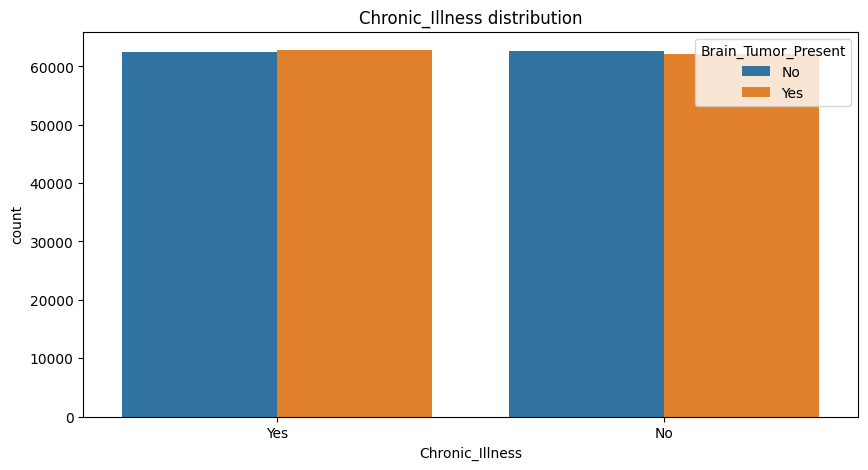

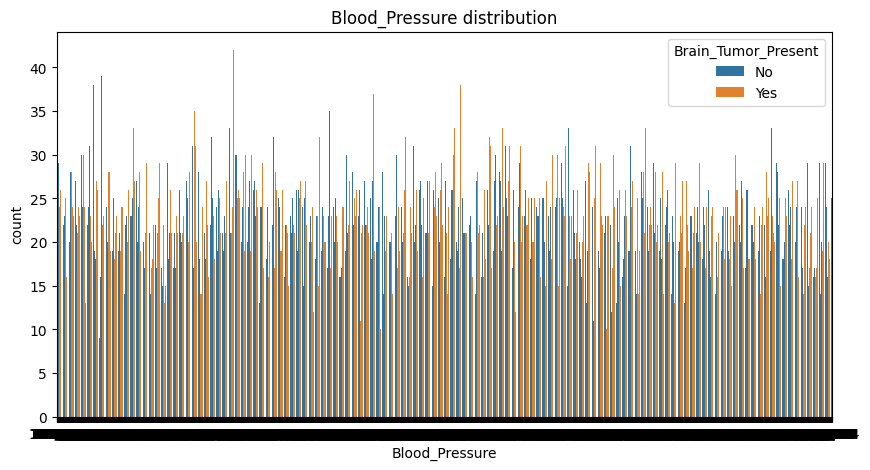

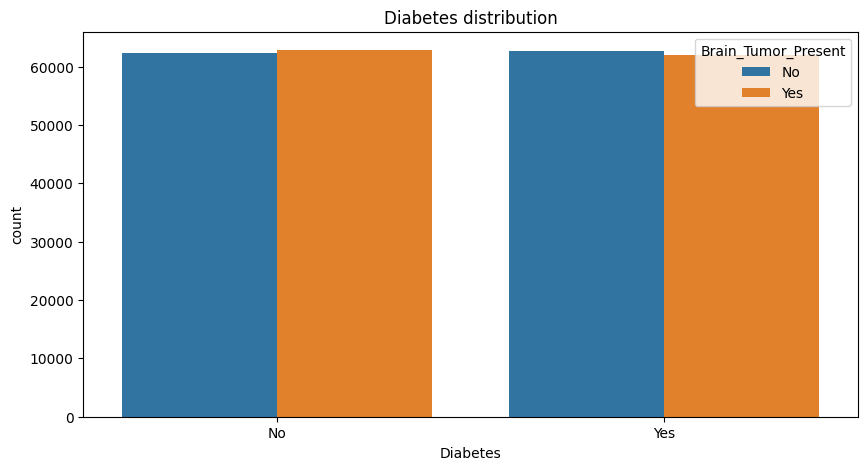

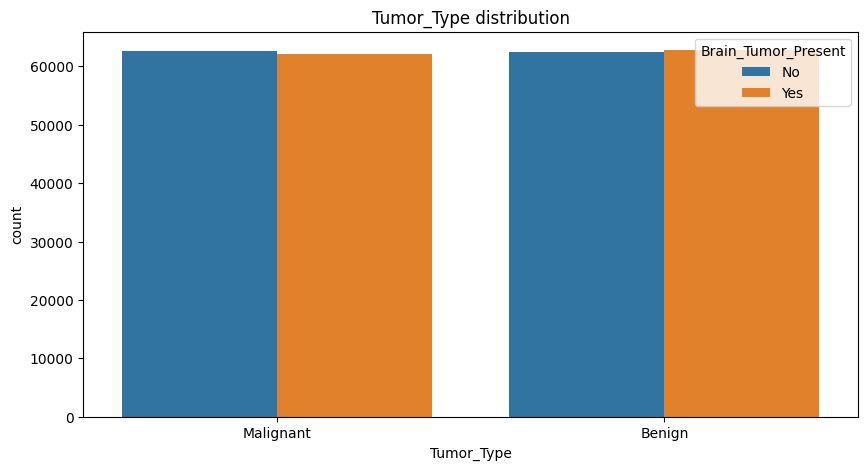

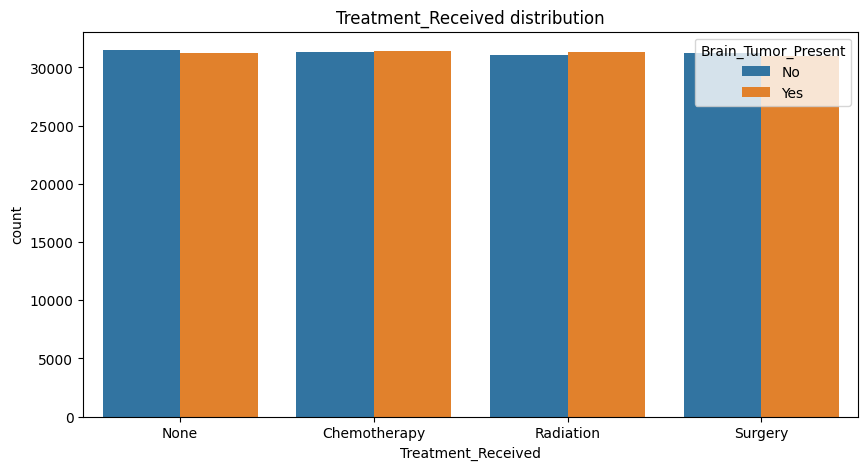

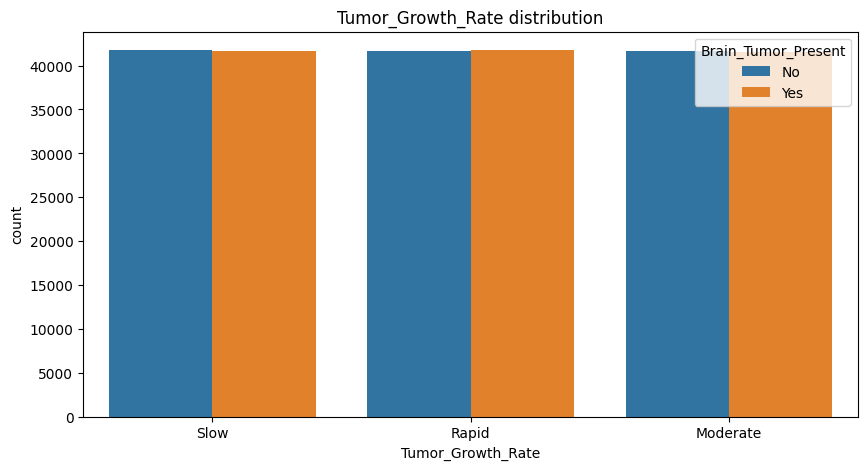

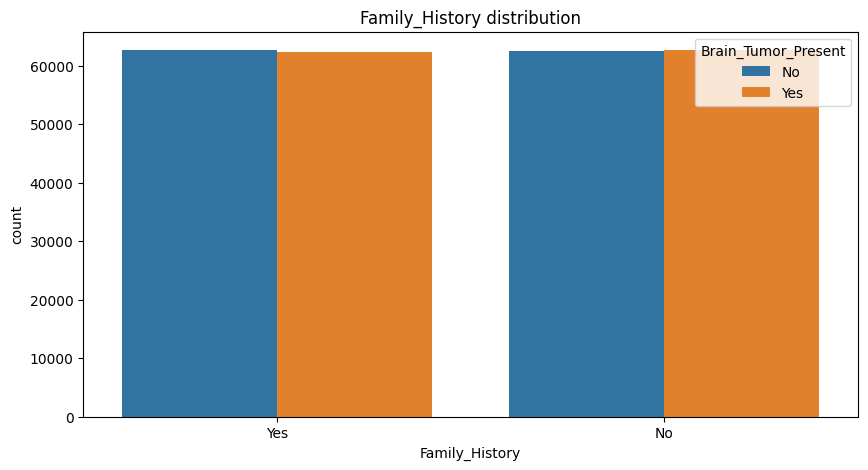

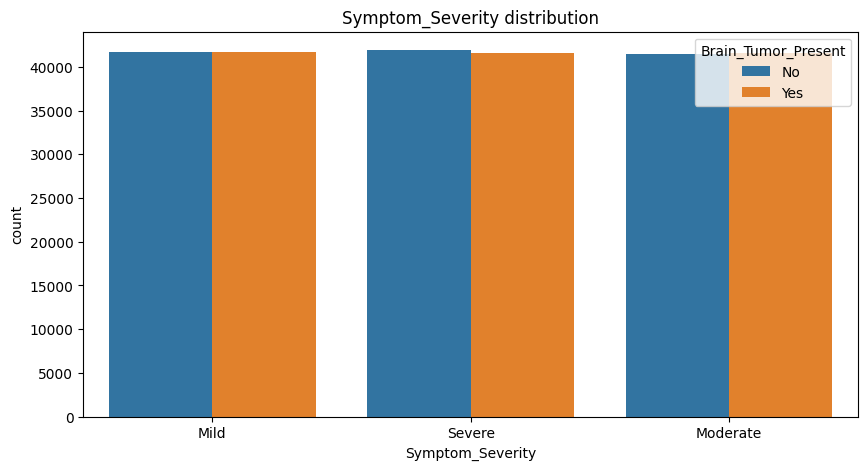

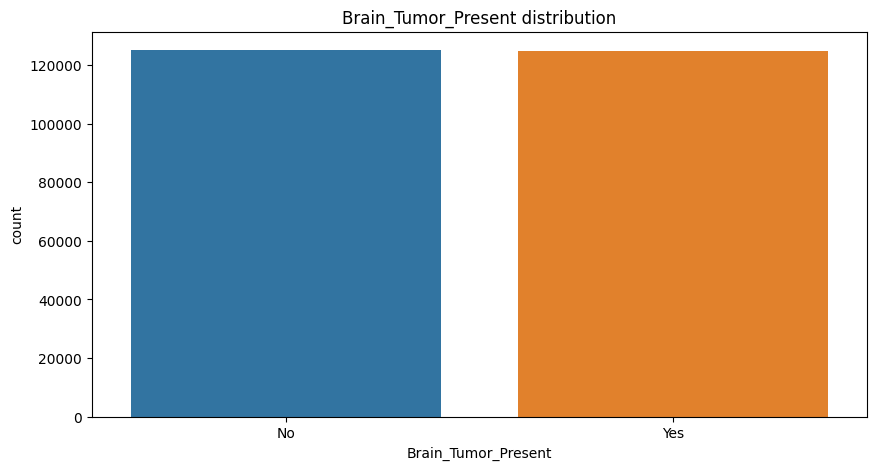

In [31]:
#categorical column compare with target column
for col in cate_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df,hue='Brain_Tumor_Present')
  plt.title(f"{col} distribution")
  plt.show()

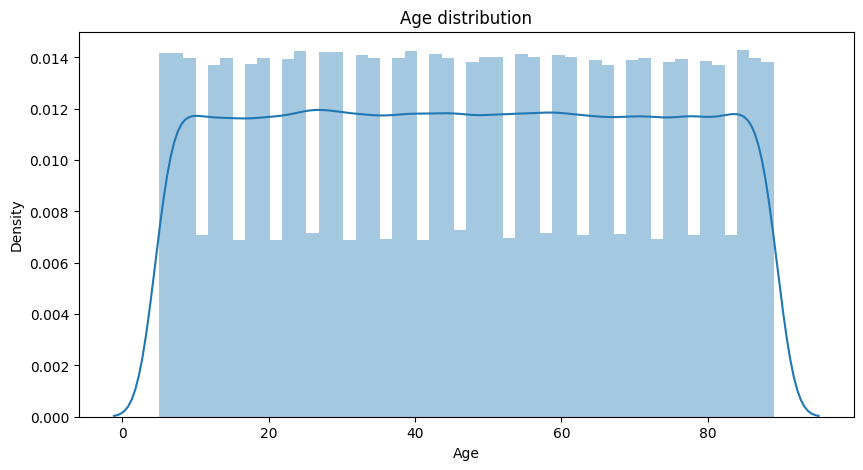

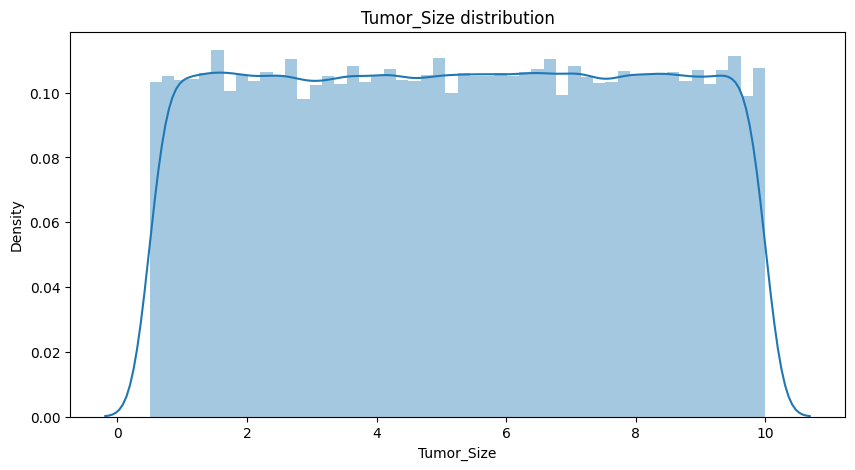

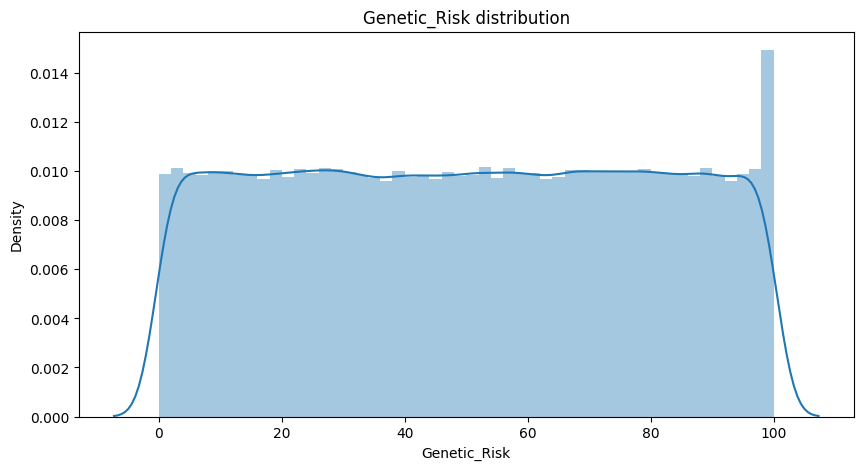

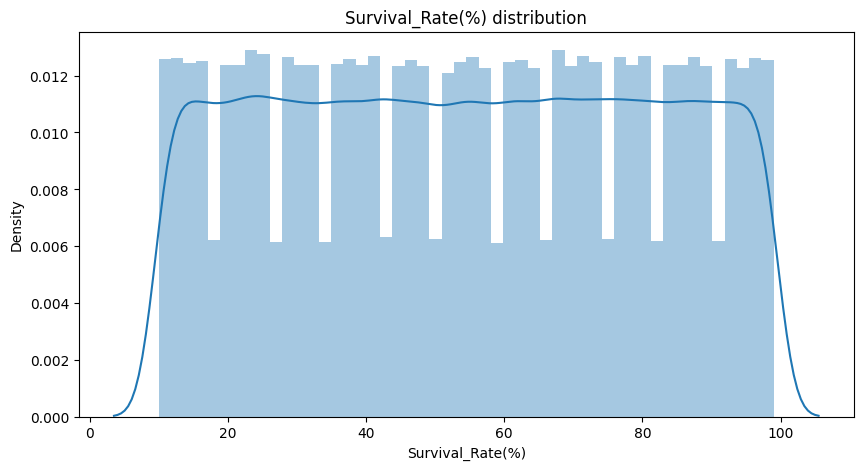

In [32]:
#data visualization numerical column distribution
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.title(f"{col} distribution")
  plt.show()

#***Preprocessing:-***
Potential Data Leakage Columns:-
These columns should be dropped because they reveal or are heavily dependent on the target variable (Brain_Tumor_Present):-

***Column	Reason to Drop (Leads to Data Leakage)***

**Tumor_Size:-**	If tumor size exists, it confirms tumor presence.\
**Tumor_Type:-**	Specifies if the tumor is benign/malignant, which assumes a confirmed diagnosis.\
**Survival_Rate(%):-**	Survival rate is based on tumor presence and severity.\
**Tumor_Growth_Rate	:-**Indicates how fast the tumor is growing—only applicable if a tumor exists.\
**Treatment_Received:-**	If treatment is received, it assumes tumor presence.


In [33]:
#drop the unncessary column
df=df.drop(columns=['Country','Gender','Genetic_Risk','Blood_Pressure'])

In [34]:
#drop column that directly related to target column
df=df.drop(columns=['Survival_Rate(%)','Tumor_Growth_Rate','Tumor_Type','Tumor_Size','Treatment_Received','Diabetes'])

In [35]:
df.columns

Index(['Age', 'Tumor_Location', 'MRI_Findings', 'Smoking_History',
       'Alcohol_Consumption', 'Radiation_Exposure', 'Head_Injury_History',
       'Chronic_Illness', 'Family_History', 'Symptom_Severity',
       'Brain_Tumor_Present'],
      dtype='object')

In [36]:
cate_col1=df.select_dtypes(include='object').columns
cate_col1

Index(['Tumor_Location', 'MRI_Findings', 'Smoking_History',
       'Alcohol_Consumption', 'Radiation_Exposure', 'Head_Injury_History',
       'Chronic_Illness', 'Family_History', 'Symptom_Severity',
       'Brain_Tumor_Present'],
      dtype='object')

#***Encoding :-***

In [37]:
#label encoding
encoder={}
le=LabelEncoder()
for col in cate_col1:
  df[col]=le.fit_transform(df[col])
  encoder[col]=le

In [38]:
encoder

{'Tumor_Location': LabelEncoder(),
 'MRI_Findings': LabelEncoder(),
 'Smoking_History': LabelEncoder(),
 'Alcohol_Consumption': LabelEncoder(),
 'Radiation_Exposure': LabelEncoder(),
 'Head_Injury_History': LabelEncoder(),
 'Chronic_Illness': LabelEncoder(),
 'Family_History': LabelEncoder(),
 'Symptom_Severity': LabelEncoder(),
 'Brain_Tumor_Present': LabelEncoder()}

#***Correlation:-***

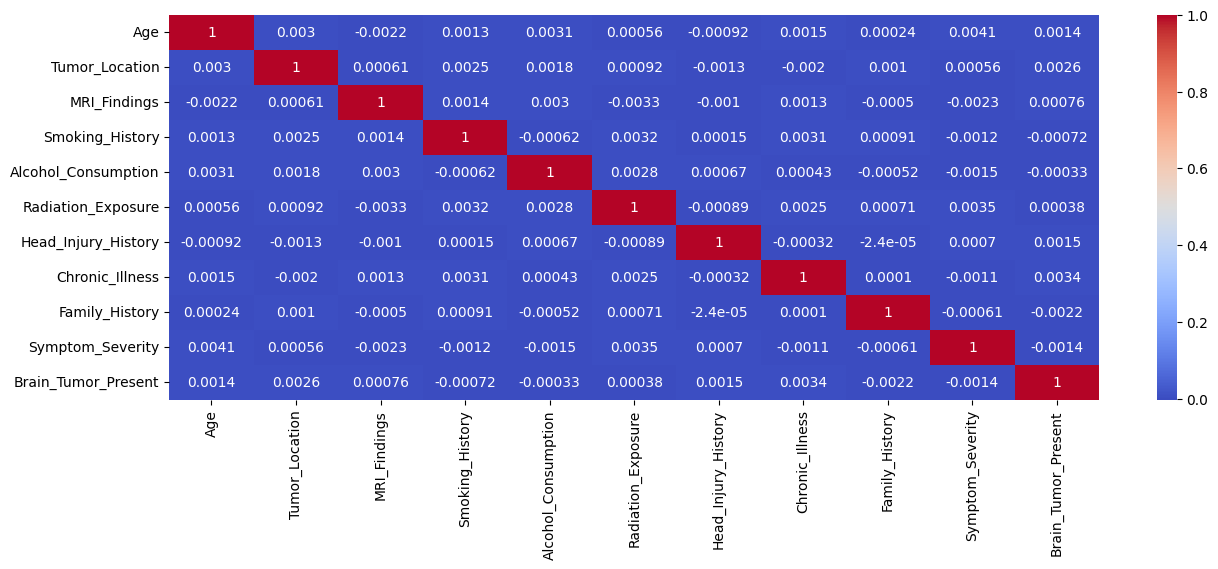

In [39]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

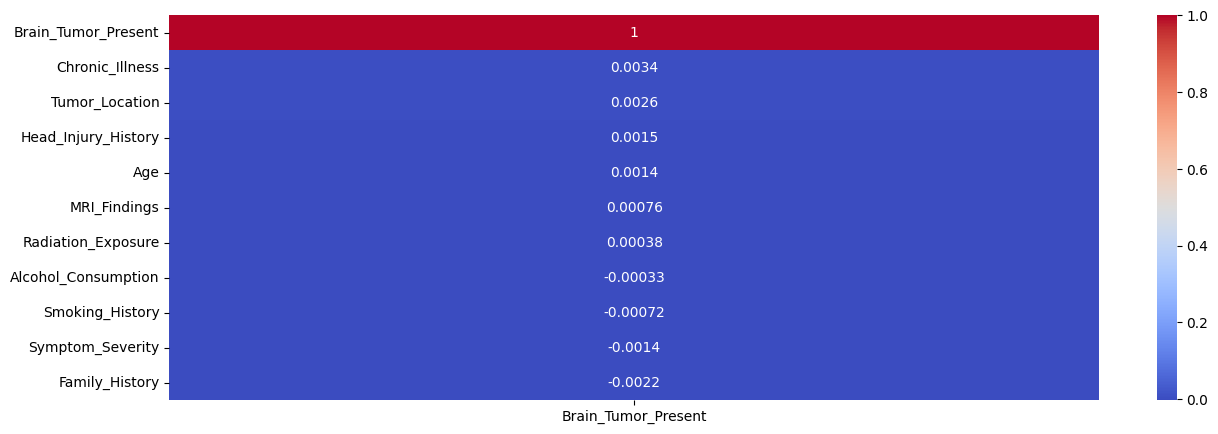

In [40]:
#correlation as per target column
plt.figure(figsize=(15,5))
sns.heatmap(df.corr()['Brain_Tumor_Present'].sort_values(ascending=False).to_frame(),annot=True,cmap='coolwarm')
plt.show()

#***Spliting X,y:-***

In [41]:
X=df.drop(columns=['Brain_Tumor_Present'])
y=df['Brain_Tumor_Present']

In [42]:
#check the target column distribution balaced or not
y.value_counts()

,count
Brain_Tumor_Present,
0,125118
1,124882


In [43]:
#spliting the train and test:-
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#***Building Model:-***

In [44]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [47]:
#predict
y_pred=model.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.50122

#**Save the Model and Encoder:-**

In [48]:
import joblib
joblib.dump(model,'Brain_Tumor_Prediction_Model.pkl')
joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']